In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation


Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('data.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,3.598474,3.538944e+10
1,2000-01-04,5.550,5.550,5.550,5.550,3.399410,2.886144e+10
2,2000-01-05,5.494,5.494,5.494,5.494,3.365107,4.303360e+10
3,2000-01-06,5.475,5.475,5.475,5.475,3.353470,3.405568e+10
4,2000-01-07,5.500,5.500,5.500,5.500,3.368784,2.091264e+10


In [4]:
df['Date'] = pd.to_datetime(df['Date']).dt.date


In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
df = df[['Date','Close']]
df.columns = ['ds','y']



In [7]:
df.head()

,ds,y
0,2000-01-03,5.875
1,2000-01-04,5.550
2,2000-01-05,5.494
3,2000-01-06,5.475
4,2000-01-07,5.500


In [8]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5849,2022-10-28
5850,2022-10-29
5851,2022-10-30
5852,2022-10-31
5853,2022-11-01


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
5849,2022-10-28,31.198573,26.295367,35.891948
5850,2022-10-29,31.065802,26.344555,36.126734
5851,2022-10-30,31.081774,26.387107,35.695677
5852,2022-10-31,31.258662,26.330668,35.964512
5853,2022-11-01,31.269464,26.340443,35.937368


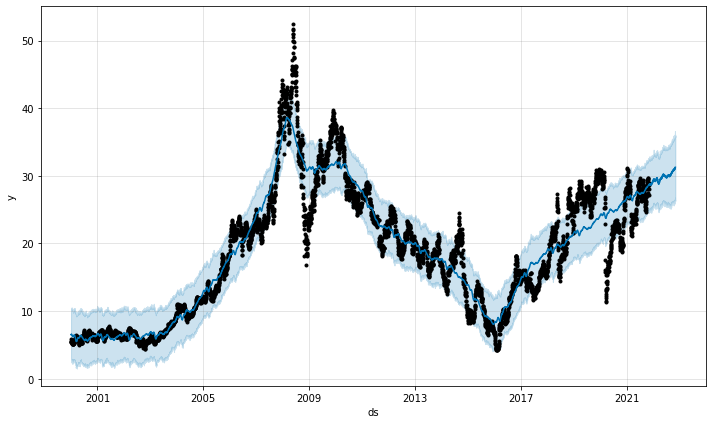

In [11]:
fig1 = m.plot(forecast)


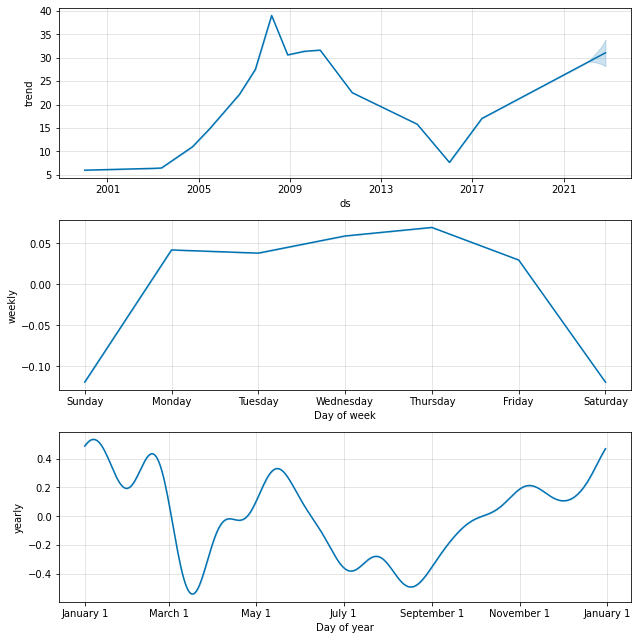

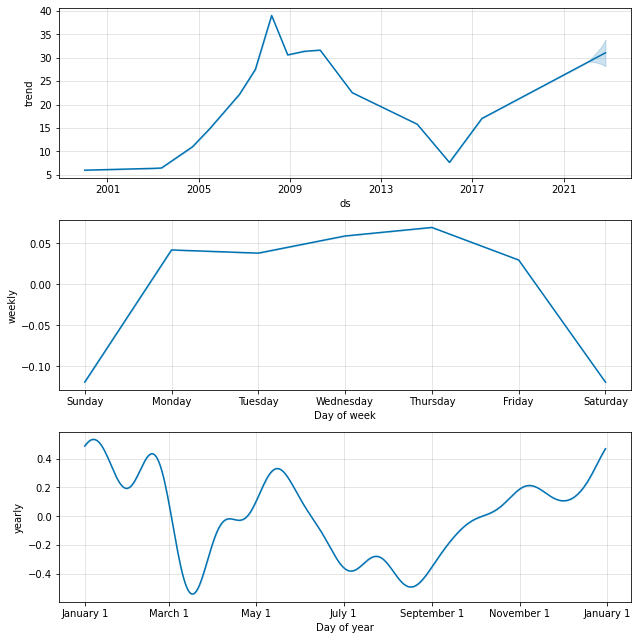

In [12]:
m.plot_components(forecast)



In [ ]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 39 forecasts with cutoffs between 2002-02-09 00:00:00 and 2020-11-01 00:00:00


  0%|          | 0/39 [00:00<?, ?it/s]

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()